In [1]:
import os
import sys
import pickle
import matplotlib.pyplot as plt

sys.path.insert(0, '..')
sys.path.insert(0, '../..')
sys.path.insert(0, '../../..')
sys.path.insert(0, '../../../..')
sys.path.insert(0, '../../../../..')

from evaluation.conformal_evaluations import ConformalEvaluation

## Load Conformal Analysis Threhsolds and All Target Cases' Conformance

In [2]:
# Load results form Conformal Analysis .pkl file
output_dir = '../../../../../../data/Helpdesk/conformal_val/conformal_conformance_results'

filename = os.path.join(output_dir, 'results.pkl')
with open(filename, 'rb') as f:
    loaded_conformal_results = pickle.load(f)
print(f"Loaded data from {filename}")

Loaded data from ../../../../../../data/Helpdesk/conformal_val/conformal_conformance_results/results.pkl


In [3]:
# Data loaded:
alpha_risk = loaded_conformal_results["alpha_risk"]

alpha_high_risk = loaded_conformal_results["alpha_high_risk"]

# dict: prefix length, r: sampled fitness score threshold lower bound with 1-alpha coverage.
q_samples_per_prefix_length = loaded_conformal_results["q_samples_per_prefix_length"]

# dict: prefix length, r: sampled fitness score threshold lower bound with 1-alpha coverage.
r_samples_per_prefix_length = loaded_conformal_results["r_samples_per_prefix_length"]

In [4]:
# Get Dict with prefix length and threshold values
q_fitness_prefix_lens = {}
r_fitness_prefix_lens = {}

for prefix_length in q_samples_per_prefix_length.keys():
    # Risk Threshold:
    q_fitness_samples = q_samples_per_prefix_length[prefix_length]
    # High-Risk Threshold:
    r_fitness_samples = r_samples_per_prefix_length[prefix_length]
    
    q_fitness_prefix_lens[prefix_length] = q_fitness_samples
    r_fitness_prefix_lens[prefix_length] = r_fitness_samples

In [5]:
# Get results from the processed inference/ test dataset storing two dicts: 
output_dir   = '../../../../../../data/Helpdesk/conformal_prediction_gn_l4'

# Ensure the directory exists
os.makedirs(output_dir, exist_ok=True)

filename = os.path.join(output_dir, 'all_inference_set.pkl')
with open(filename, 'rb') as f:
    loaded_results_all = pickle.load(f)
print(f"Loaded data from {filename}")
# grab the list of all metric‐names from the first entry
fields_all = list(loaded_results_all[next(iter(loaded_results_all))].keys())
# build the “pivoted” dict of dicts
seperate_dict_all = {field: { prefix: subdict[field] for prefix, subdict in loaded_results_all.items() } for field in fields_all}

filename = os.path.join(output_dir, 'risk_inference_set.pkl')
with open(filename, 'rb') as f:
    loaded_results_risk = pickle.load(f)
print(f"Loaded data from {filename}")
fields_risk = list(loaded_results_risk[next(iter(loaded_results_risk))].keys())
seperate_dict_risk = {field: { prefix: subdict[field] for prefix, subdict in loaded_results_risk.items() } for field in fields_risk}

filename = os.path.join(output_dir, 'discarded_risk_inference_set.pkl')
with open(filename, 'rb') as f:
    loaded_results_discarded_risk = pickle.load(f)
print(f"Loaded data from {filename}")
fields_discarded_risk = list(loaded_results_discarded_risk[next(iter(loaded_results_discarded_risk))].keys())
seperate_dict_discarded_risk = {field: { prefix: subdict[field] for prefix, subdict in loaded_results_discarded_risk.items() } for field in fields_discarded_risk}

filename = os.path.join(output_dir, 'high_risk_inference_set.pkl')
with open(filename, 'rb') as f:
    loaded_results_high_risk = pickle.load(f)
print(f"Loaded data from {filename}")
fields_high_risk = list(loaded_results_high_risk[next(iter(loaded_results_high_risk))].keys())
seperate_dict_high_risk = {field: { prefix: subdict[field] for prefix, subdict in loaded_results_high_risk.items() } for field in fields_high_risk}

filename = os.path.join(output_dir, 'discarded_high_risk_inference_set.pkl')
with open(filename, 'rb') as f:
    loaded_results_discarded_high_risk = pickle.load(f)
print(f"Loaded data from {filename}")
fields_discarded_high_risk = list(loaded_results_discarded_high_risk[next(iter(loaded_results_discarded_high_risk))].keys())
seperate_dict_discarded_high_risk = {field: { prefix: subdict[field] for prefix, subdict in loaded_results_discarded_high_risk.items() } for field in fields_discarded_high_risk}

Loaded data from ../../../../../../data/Helpdesk/conformal_prediction_gn_l4/all_inference_set.pkl
Loaded data from ../../../../../../data/Helpdesk/conformal_prediction_gn_l4/risk_inference_set.pkl
Loaded data from ../../../../../../data/Helpdesk/conformal_prediction_gn_l4/discarded_risk_inference_set.pkl
Loaded data from ../../../../../../data/Helpdesk/conformal_prediction_gn_l4/high_risk_inference_set.pkl
Loaded data from ../../../../../../data/Helpdesk/conformal_prediction_gn_l4/discarded_high_risk_inference_set.pkl


In [6]:
all_set_targets = seperate_dict_all['target_conformance']
all_fitness_pref_len = {}
for pref_len, cases_conf in all_set_targets.items():
    fitness_scores = []
    for case_conf in cases_conf:
        fitness_scores.append(case_conf['fitness'])
    all_fitness_pref_len[pref_len] = fitness_scores

In [7]:
conf_ev_obj = ConformalEvaluation()

Miscovergae Rate:  0.3278520041109969 <= 0.5
Coverage Rate:  0.6721479958890031 >= 0.5


Miscovergae Rates per prefix length:  {1: 0.34205607476635513, 2: 0.34392523364485983, 3: 0.3489278752436647, 4: 0.19047619047619047, 5: 0.42045454545454547, 6: 0.18421052631578946, 7: 0.3888888888888889, 8: 0.16666666666666666, 9: 0.0, 10: 0.0}
Covergae Rates per prefix length:  {1: 0.6579439252336449, 2: 0.6560747663551402, 3: 0.6510721247563354, 4: 0.8095238095238095, 5: 0.5795454545454546, 6: 0.8157894736842105, 7: 0.6111111111111112, 8: 0.8333333333333334, 9: 1.0, 10: 1.0}


Avg. Size of Case per prefix length in Coverage Set:  109.4
Avg Size of Cases per prefix length in Risk Set:  106.5


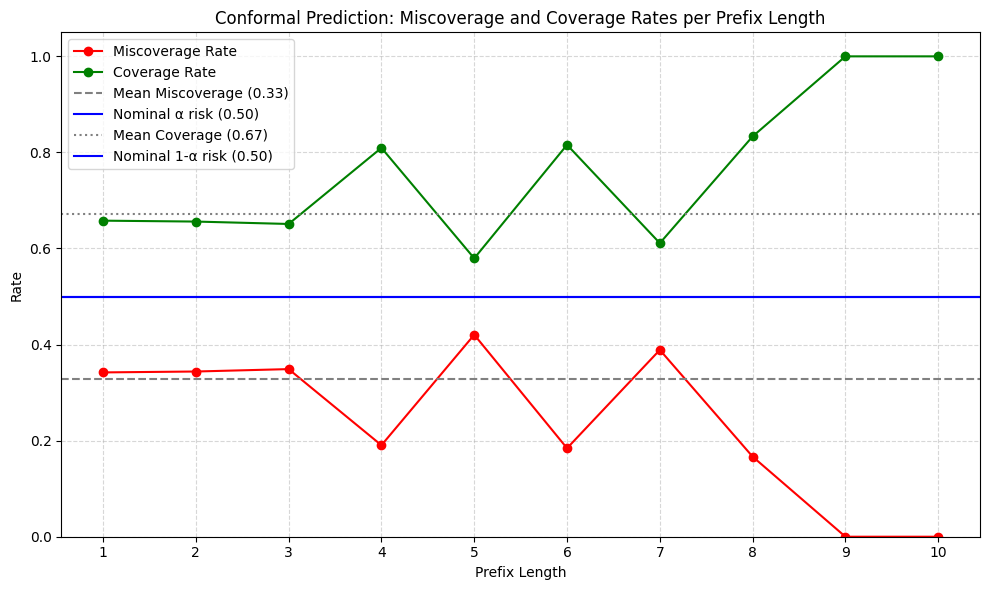

In [8]:
# Risk: Miscovergae (Validity) and Coverage set

miscoverage, coverage, miscoverage_pref_len, coverage_pref_len = conf_ev_obj.coverage(targets_conformance=all_fitness_pref_len, threshold_values=q_fitness_prefix_lens)

print("Miscovergae Rate: ", miscoverage, "<=", alpha_risk)
print("Coverage Rate: ", coverage, ">=", 1-alpha_risk)

print("\n")

print("Miscovergae Rates per prefix length: ", miscoverage_pref_len)
print("Covergae Rates per prefix length: ", coverage_pref_len)

avg_size_coverage, avg_size_miscovergae =conf_ev_obj.size(cov_set= seperate_dict_discarded_risk['samples_conformance'], miscov_set=seperate_dict_risk['samples_conformance'])

print("\n")

print("Avg. Size of Case per prefix length in Coverage Set: ", avg_size_coverage)
print("Avg Size of Cases per prefix length in Risk Set: ", avg_size_miscovergae)

# Convert to lists
prefixes = sorted(miscoverage_pref_len.keys())
miscoverage_vals = [miscoverage_pref_len[p] for p in prefixes]
coverage_vals = [coverage_pref_len[p] for p in prefixes]

# Plotting
plt.figure(figsize=(10, 6))
plt.plot(prefixes, miscoverage_vals, marker='o', label='Miscoverage Rate', color='red')
plt.plot(prefixes, coverage_vals, marker='o', label='Coverage Rate', color='green')

# Mean lines
plt.axhline(miscoverage, color='grey', linestyle='--', label=f'Mean Miscoverage ({miscoverage:.2f})')
plt.axhline(alpha_risk, color='blue', linestyle='-', label=f'Nominal α risk ({alpha_risk:.2f})')

plt.axhline(coverage, color='grey', linestyle=':', label=f'Mean Coverage ({coverage:.2f})')
plt.axhline(1-alpha_risk, color='blue', linestyle='-', label=f'Nominal 1-α risk ({1-alpha_risk:.2f})')

plt.title('Conformal Prediction: Miscoverage and Coverage Rates per Prefix Length')
plt.xlabel('Prefix Length')
plt.ylabel('Rate')
plt.xticks(prefixes)
plt.ylim(0, 1.05)
plt.grid(True, linestyle='--', alpha=0.5)
plt.legend()
plt.tight_layout()
plt.show()

Miscovergae Rate:  0.21891058581706063 <= 0.25
Coverage Rate:  0.7810894141829394 >= 0.75


Miscovergae Rates per prefix length:  {1: 0.2635514018691589, 2: 0.3383177570093458, 3: 0.07797270955165692, 4: 0.18571428571428572, 5: 0.18181818181818182, 6: 0.18421052631578946, 7: 0.05555555555555555, 8: 0.16666666666666666, 9: 0.0, 10: 0.0}
Covergae Rates per prefix length:  {1: 0.7364485981308411, 2: 0.6616822429906541, 3: 0.9220272904483431, 4: 0.8142857142857143, 5: 0.8181818181818181, 6: 0.8157894736842105, 7: 0.9444444444444444, 8: 0.8333333333333334, 9: 1.0, 10: 1.0}


Avg. Size of Case per prefix length in Coverage Set:  98.57142857142857
Avg Size of Cases per prefix length in Risk Set:  20.25


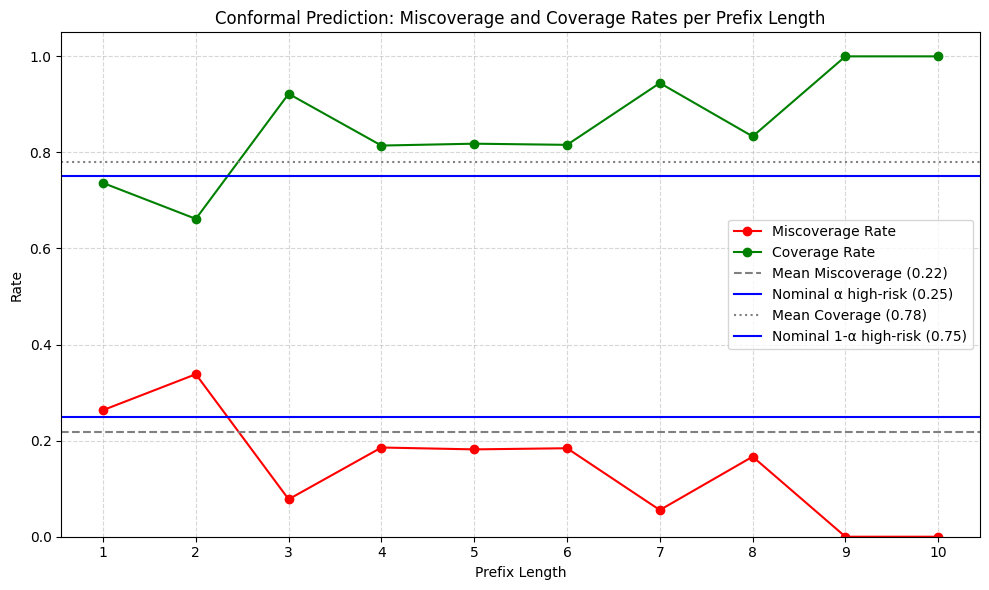

In [9]:
# High Risk: Miscovergae (Validity) and Coverage set
miscoverage, coverage, miscoverage_pref_len, coverage_pref_len = conf_ev_obj.coverage(targets_conformance=all_fitness_pref_len, threshold_values=r_fitness_prefix_lens)

print("Miscovergae Rate: ", miscoverage, "<=", alpha_high_risk)
print("Coverage Rate: ", coverage, ">=", 1-alpha_high_risk)

print("\n")

print("Miscovergae Rates per prefix length: ", miscoverage_pref_len)
print("Covergae Rates per prefix length: ", coverage_pref_len)

avg_size_coverage, avg_size_miscovergae = conf_ev_obj.size(cov_set= seperate_dict_discarded_high_risk['samples_conformance'], miscov_set=seperate_dict_high_risk['samples_conformance'])

print("\n")

print("Avg. Size of Case per prefix length in Coverage Set: ", avg_size_coverage)
print("Avg Size of Cases per prefix length in Risk Set: ", avg_size_miscovergae)

# Convert to lists
prefixes = sorted(miscoverage_pref_len.keys())
miscoverage_vals = [miscoverage_pref_len[p] for p in prefixes]
coverage_vals = [coverage_pref_len[p] for p in prefixes]

# Plotting
plt.figure(figsize=(10, 6))
plt.plot(prefixes, miscoverage_vals, marker='o', label='Miscoverage Rate', color='red')
plt.plot(prefixes, coverage_vals, marker='o', label='Coverage Rate', color='green')

# Mean lines
plt.axhline(miscoverage, color='grey', linestyle='--', label=f'Mean Miscoverage ({miscoverage:.2f})')
plt.axhline(alpha_high_risk, color='blue', linestyle='-', label=f'Nominal α high-risk ({alpha_high_risk:.2f})')


plt.axhline(coverage, color='grey', linestyle=':', label=f'Mean Coverage ({coverage:.2f})')
plt.axhline(1-alpha_high_risk, color='blue', linestyle='-', label=f'Nominal 1-α high-risk ({1-alpha_high_risk:.2f})')


plt.title('Conformal Prediction: Miscoverage and Coverage Rates per Prefix Length')
plt.xlabel('Prefix Length')
plt.ylabel('Rate')
plt.xticks(prefixes)
plt.ylim(0, 1.05)
plt.grid(True, linestyle='--', alpha=0.5)
plt.legend()
plt.tight_layout()
plt.show()
